# Data Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives the information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Variable Notes


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Importing Libraries

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Data Import

In [165]:
ds=pd.read_csv('titanic_train.csv')
train_data=pd.DataFrame(ds)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The target varible is 'Survived' which indicates whether a passenger was able to survive or not. So it can have only 2 possible values 0 and 1.
We have 11 different variables which can be used as feature to predict the outcome of our target. Also we can clearly see that there are missing values in 'Cabin'. The missings can irritate our algorithms, so cleaning is a crucial part.

# EDA

In [166]:
print("Missing in our dataset: ")
display(train_data.isnull().sum())

Missing in our dataset: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in Age, Cabin and Embarked columns. We will perform data cleaning.

**Age**

In [167]:
print('Missing values in Age: ')
print('Missing Count: ',train_data['Age'].isnull().sum())
print('Missing Percentage: ', train_data['Age'].isnull().sum()/len(train_data)*100)

Missing values in Age: 
Missing Count:  177
Missing Percentage:  19.865319865319865


We can see that more than 19% values are missing in the Age column.

<AxesSubplot:xlabel='Age', ylabel='Density'>

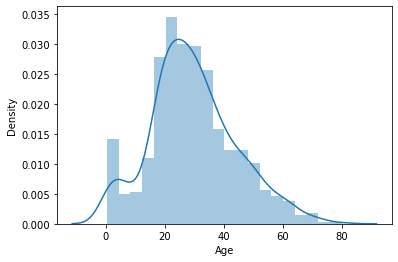

In [168]:
sns.distplot(train_data['Age'])

We don´t want to delete all rows with missing age values, therefore we will replace the missings. As you can see we have a right-skrewed distribution for age and the median should a good choice for substitution.

In [169]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [170]:
print('Median for age separated by Pclass')
display(train_data.groupby('Pclass')['Age'].median())
print('Median for age separated by Pclass and Sex')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())
print('Number of cases')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())

Median for age separated by Pclass


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for age separated by Pclass and Sex


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

We can observe that the median of age differs for the passenger classes. Professional advancement usually comes with increasing age and experience. Therefore, people with a higher socio-economic status are older on average. If we split up by sex we see that there is still a difference because women are younger in general. In a last step I have checked the number of cases to ensure that there are still enough cases in each category. We will use these median values to replace the missings.

In [171]:
#replace the missing values with the median of each group
train_data['Age']=train_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [172]:
train_data['Age'].isnull().sum()

0

We can see that there are no missings now. All the missings have been replaced now with the median of each group.

**Lets work on missings in Cabin column now.**

In [173]:
print('Total values in the dataset ', train_data.count())
print('Total unique values in Cabin column ', train_data['Cabin'].nunique())
print('Total missing values in Cabin column ',train_data['Cabin'].isnull().sum())

Total values in the dataset  PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
Total unique values in Cabin column  147
Total missing values in Cabin column  687


There are a lot of missing values but we should use the cabin variable because it can be an important predictor.

In [174]:
#Keep all first letters of cabin in a new variable and use 'M' for each missing
train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

Text(0.5, 0.98, 'Survival rates for different cabins')

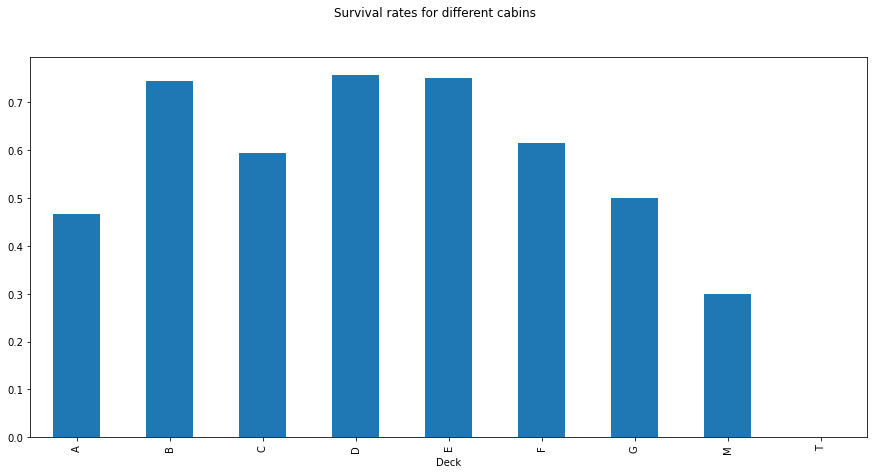

In [175]:
train_data[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for different cabins')

There are significant differences in survival rates of people of different deck. We will group up some decks.

In [176]:
idx=train_data[train_data['Deck']=='T'].index
train_data.loc[idx,'Deck']='A'
train_data['Deck']=train_data['Deck'].replace(['A','B','C'],'ABC')
train_data['Deck']=train_data['Deck'].replace(['D','E'],'DE')
train_data['Deck']=train_data['Deck'].replace(['F','G'],'FG')

train_data['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

**Lets work on Missings in Embarked column**

In [177]:
train_data['Embarked'].isnull().sum()

2

There are only 2 null values in this column.

In [178]:
train_data.loc[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,ABC
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,ABC


In [179]:
train_data.loc[train_data['Embarked'].isnull(),'Embarked']='S'

We have filled every missing value in our data set and didn´t drop a column yet. We used statistical methods for age and fare, created a new category for cabin and did some research for the missings in embarked. Let´s have a double check if everything is fine now.

In [180]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
dtype: int64

Now we can remove the column 'PassengerId' as it does not contribute to the Survival rate.

In [181]:
train_data=train_data.drop('PassengerId',axis=1)

In [182]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


# Feature Engineering

Techniques we will use so far:
- Binning continous variables (e.g. Age)
- Create new features out of existing variables (e.g. Title)
- Label encoding for non numeric features (e.g. Sex)
- One hot encoding for categorial features (e.g. Pclass)

**Binning**

<AxesSubplot:>

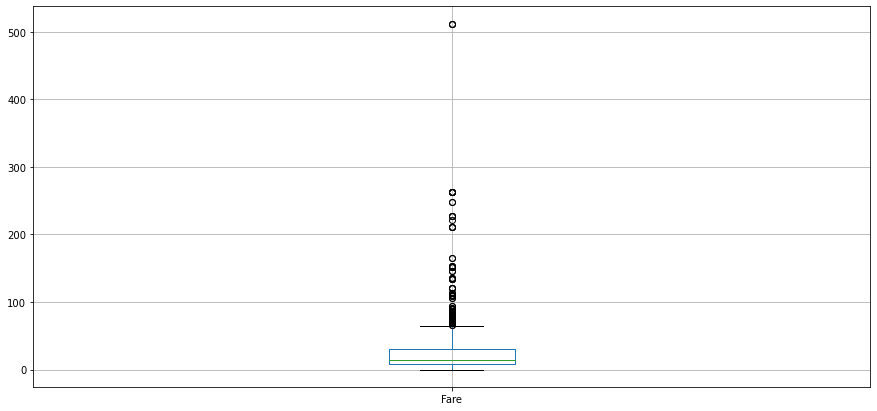

In [183]:
train_data.boxplot(column=['Fare'],figsize=(15,7))

<AxesSubplot:>

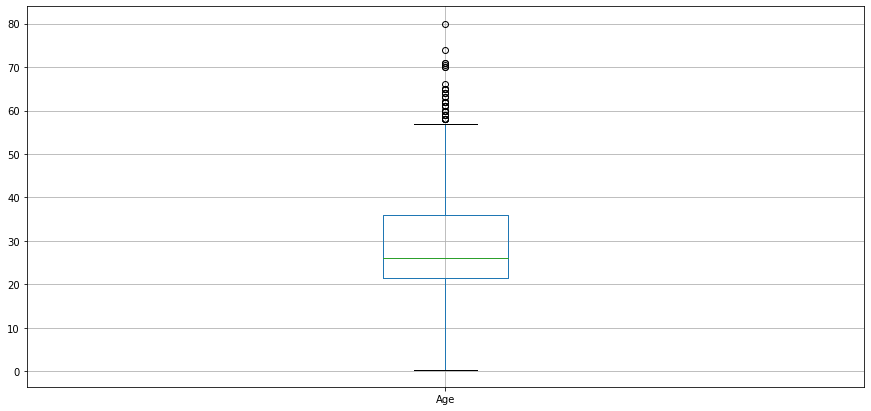

In [184]:
train_data.boxplot(column=['Age'],figsize=(15,7))

As you can see, there are outliers for both age and fare. The range of values is much higher for fare compared to age. We will cut the distribution into pieces so that the outliers do not irritate our algorithm. For fare we will assign the same number of cases to each category and for Age we will build the categories based on the values of the variable. This is also the difference between cut and qcut. With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. With qcut we decompose a distribution so that there are the same number of cases in each category.

In [185]:
train_data['Age_bin'] = pd.cut(train_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [186]:
train_data['Age_bin'].value_counts()

Adult       562
Elder       150
Teenage     110
Children     69
Name: Age_bin, dtype: int64

For Age, each category has a different number of cases.

In [187]:
train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [188]:
train_data['Fare_bin'].value_counts()

Average_fare    229
median_fare     217
Low_fare        208
high_fare       184
Name: Fare_bin, dtype: int64

For Fare, each category has almost same number of cases.

In [189]:
train_data[['Age_bin','Survived']].groupby('Age_bin')['Survived'].mean()

Age_bin
Children    0.579710
Teenage     0.381818
Adult       0.364769
Elder       0.366667
Name: Survived, dtype: float64

In [190]:
train_data[['Fare_bin','Survived']].groupby('Fare_bin')['Survived'].mean()

Fare_bin
Low_fare        0.206731
median_fare     0.308756
Average_fare    0.445415
high_fare       0.548913
Name: Survived, dtype: float64

From the above two results, we can conclude that on average, younger passengers have a higher chance of survival and so do people with higher ticket prices. Young people were probably rescued first and the people with higher ticket prices had access to the lifeboats first.

Text(0.5, 0.98, 'Survival rates for Age categories')

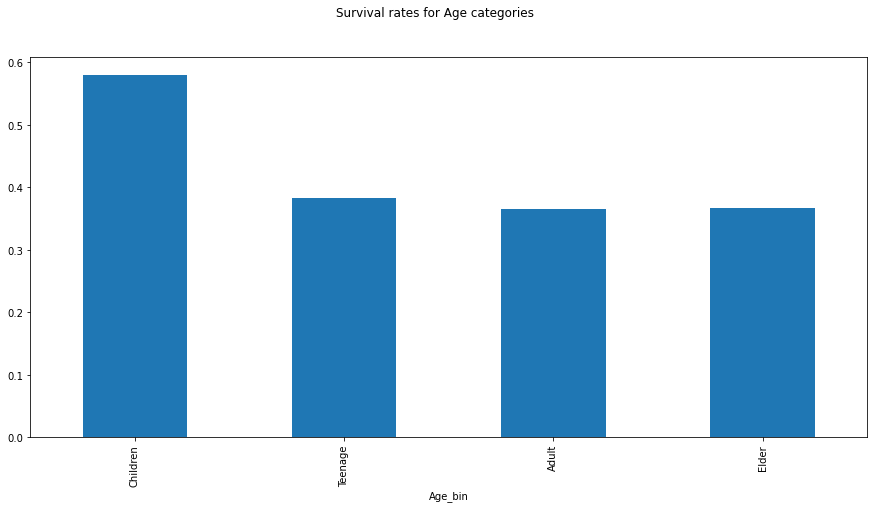

In [191]:
train_data[['Age_bin','Survived']].groupby('Age_bin')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for Age categories')

Text(0.5, 0.98, 'Survival rates for Age categories')

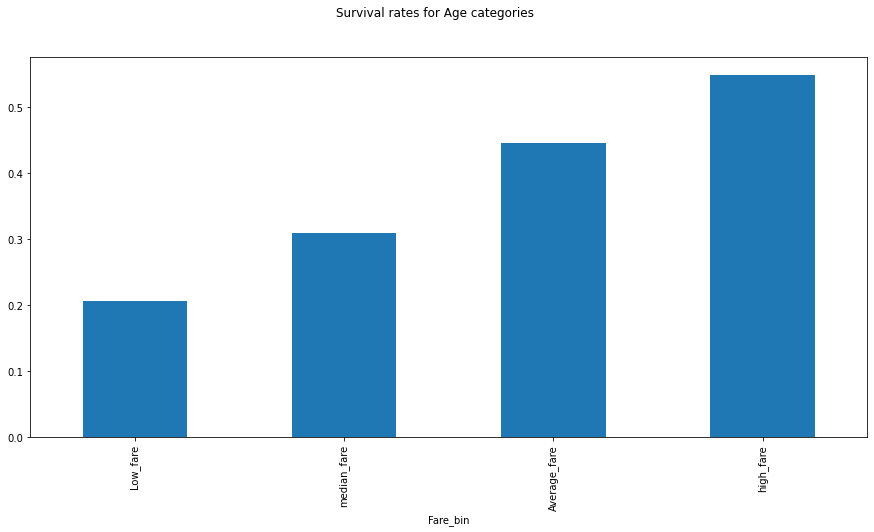

In [192]:
train_data[['Fare_bin','Survived']].groupby('Fare_bin')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for Age categories')

From the above graphs as well, we can make the same conclusion that younger people and people with high fare tickets had higher survival rates.

**Create New feature out of existing features**

**Family Size:**

There are two interesting variables in our data set which tells us something about family size. SibSp defines how many siblings and spouses a passenger had and parch how many parents and childrens. We can summarize these variables and add 1 (for each passer-by) to get the family size.

In [193]:
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']+1

<AxesSubplot:>

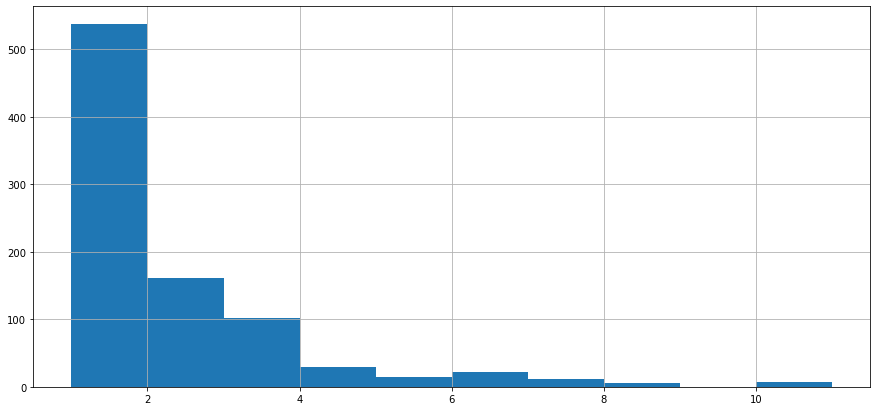

In [194]:
train_data['Family_Size'].hist(figsize=(15,7))

In [195]:
train_data['Family_Size_bin']=train_data["Family_Size"].map(lambda s: 1 if s==1 else (2 if s==2 else (3 if 3<=s<=4 else (4 if s>=5 else 0))))

In [196]:
train_data['Family_Size_bin'].value_counts()

1    537
2    161
3    131
4     62
Name: Family_Size_bin, dtype: int64

Text(0.5, 0.98, 'Survival rates for family size categories')

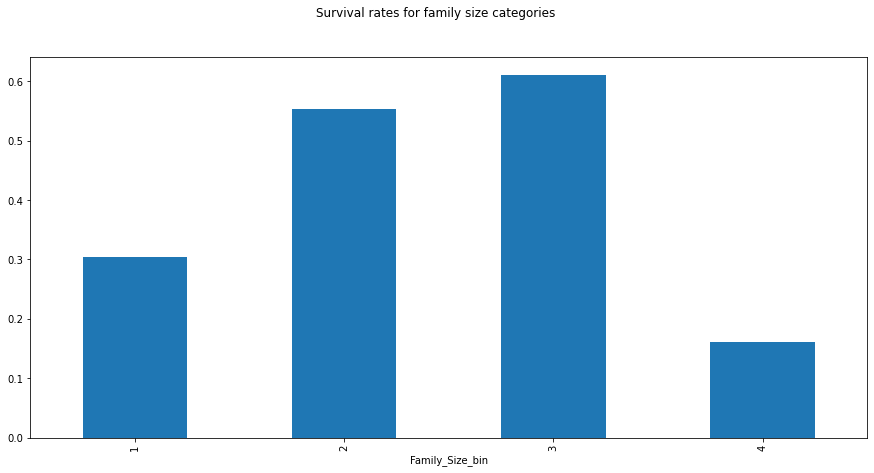

In [197]:
train_data[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for family size categories')

One thesis is that families have a higher chance of survival than singles because they are better able to support themselves and were rescued with priority. However, if the families are too large, coordination is likely to be very difficult in an exceptional situation.

**Tickets**

In [198]:
train_data['Ticket_Frequency']=train_data.groupby('Ticket')['Ticket'].transform('count')

We expect a correlation between ticket frequencies and survival rates, because identical ticket numbers are an indicator that people have travelled together.

In [199]:
train_data[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()

,Survived
Ticket_Frequency,
1,0.297989
2,0.574468
3,0.698413
4,0.500000
5,0.000000
6,0.000000
7,0.238095


As expected there are some differences between the survival rates for each ticket frequency.

**Title**

The name provides us very important information about the socioeconomic status of a passenger. We can answer the question if someone is married or not or if someone has a formal title which could be an indicator for a higher social status.

In [200]:
data = [train_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)



In [201]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_bin,Fare_bin,Family_Size,Family_Size_bin,Ticket_Frequency,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,Adult,Low_fare,2,2,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,ABC,Adult,high_fare,2,2,1,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,Adult,median_fare,1,1,1,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,ABC,Adult,high_fare,2,2,2,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,M,Adult,median_fare,1,1,1,1


# Label and One Hot Enconding

In [202]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features=['Embarked','Sex','Deck']
for feature in non_numeric_features:
    train_data[feature]=LabelEncoder().fit_transform(train_data[feature])

In [158]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_bin,Fare_bin,Family_Size,Family_Size_bin,Ticket_Frequency,Title
0,0,3,1,22,1,0,A/5 21171,7.2500,NaN,2,3,Adult,Low_fare,2,2,1,1
1,1,1,0,38,1,0,PC 17599,71.2833,C85,0,0,Adult,high_fare,2,2,1,3
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,3,Adult,median_fare,1,1,1,2
3,1,1,0,35,1,0,113803,53.1000,C123,2,0,Adult,high_fare,2,2,2,3
4,0,3,1,35,0,0,373450,8.0500,NaN,2,3,Adult,median_fare,1,1,1,1


In [206]:
train_data = pd.get_dummies(train_data, columns = ["Age_bin","Fare_bin"],
                             prefix=["Age_type","Fare_type"])

In [207]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Ticket_Frequency,Title,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,...,1,1,0,0,1,0,1,0,0,0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,...,1,3,0,0,1,0,0,0,0,1
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,...,1,2,0,0,1,0,0,1,0,0
3,1,1,0,35.0,1,0,113803,53.1000,C123,2,...,2,3,0,0,1,0,0,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,NaN,2,...,1,1,0,0,1,0,0,1,0,0


In [205]:
train_data['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

As the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [209]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Deck', 'Family_Size', 'Family_Size_bin',
       'Ticket_Frequency', 'Title', 'Age_type_Children', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Fare_type_Low_fare',
       'Fare_type_median_fare', 'Fare_type_Average_fare',
       'Fare_type_high_fare'],
      dtype='object')

In [211]:
drop_column = ['Age','Fare','Ticket','Cabin','Parch','SibSp']
train_data.drop(drop_column, axis=1, inplace = True)

In [213]:
train_data.head()

,Survived,Pclass,Sex,Embarked,Deck,Family_Size,Family_Size_bin,Ticket_Frequency,Title,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,2,3,2,2,1,1,0,0,1,0,1,0,0,0
1,1,1,0,0,0,2,2,1,3,0,0,1,0,0,0,0,1
2,1,3,0,2,3,1,1,1,2,0,0,1,0,0,1,0,0
3,1,1,0,2,0,2,2,2,3,0,0,1,0,0,0,0,1
4,0,3,1,2,3,1,1,1,1,0,0,1,0,0,1,0,0


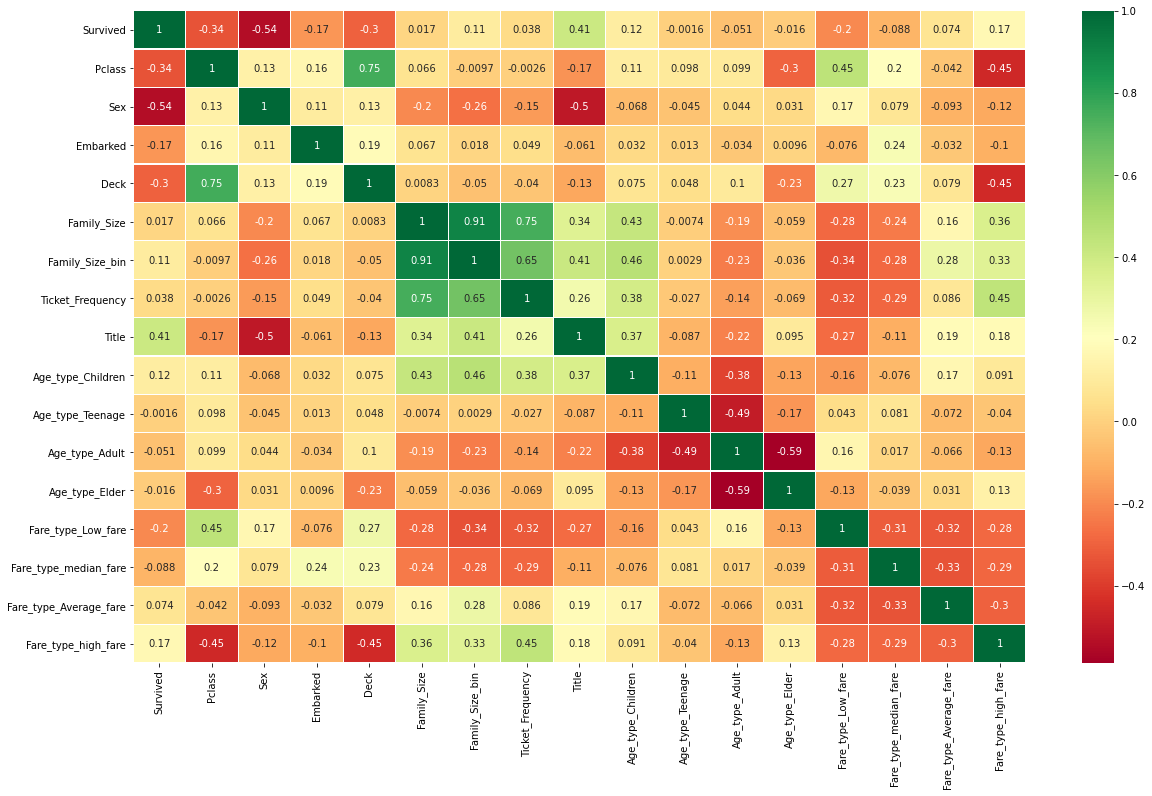

In [214]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [216]:
corr_matrix=train_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived                  1.000000
Title                     0.407753
Fare_type_high_fare       0.173164
Age_type_Children         0.116691
Family_Size_bin           0.108392
Fare_type_Average_fare    0.074470
Ticket_Frequency          0.038247
Family_Size               0.016639
Age_type_Teenage         -0.001559
Age_type_Elder           -0.015887
Age_type_Adult           -0.051250
Fare_type_median_fare    -0.087603
Embarked                 -0.167675
Fare_type_Low_fare       -0.200973
Deck                     -0.297898
Pclass                   -0.338481
Sex                      -0.543351
Name: Survived, dtype: float64

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

**Pairplots**

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

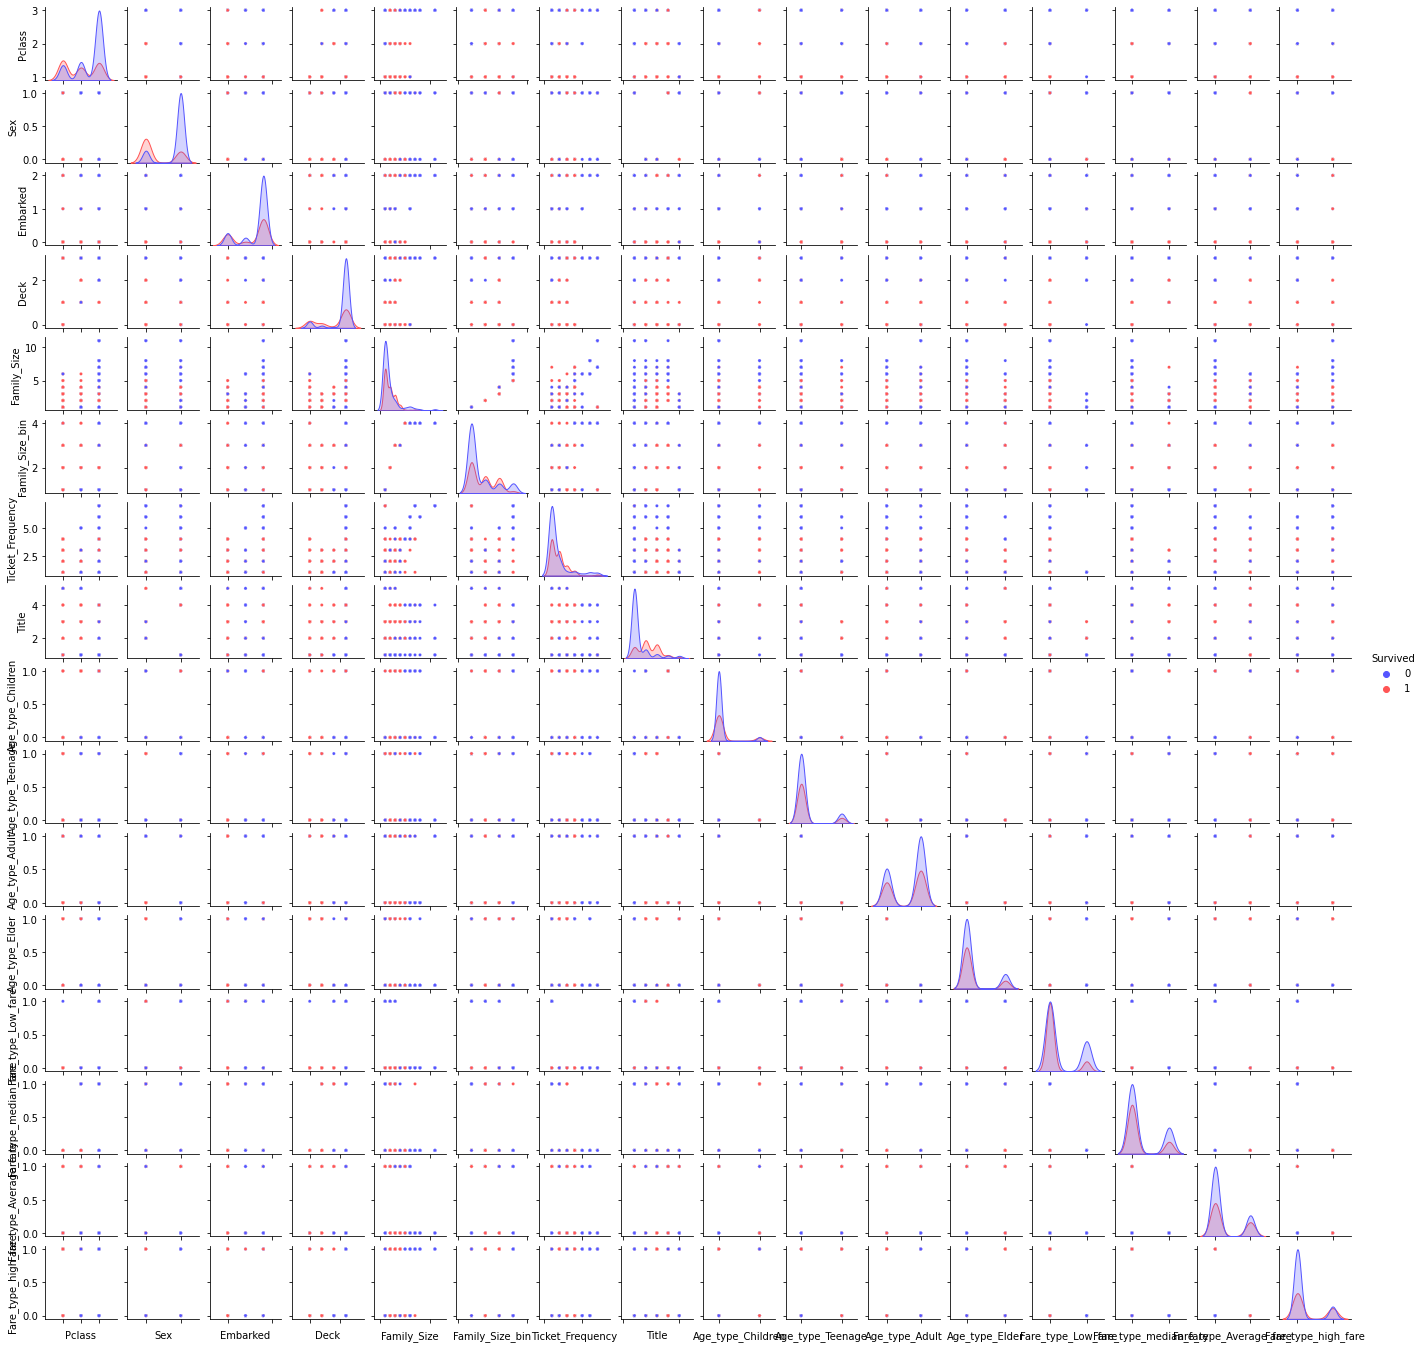

In [217]:
g = sns.pairplot(data=train_data, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

# ML Model

In [218]:
x=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [219]:
x.shape

(891, 16)

In [220]:
y.shape

(891,)

**Finding Best Random State**

In [222]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8656716417910447 on random state  93


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=93)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

model_classify = [RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors = 3),GaussianNB() ,LinearSVC(), DecisionTreeClassifier(),AdaBoostClassifier(),LogisticRegression()]
df=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','Difference'])


for model in model_classify:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_final=acc*100
    print('Score: ', acc_final)
    scr=cross_val_score(m,x,y,cv=5)
    scr_final=(scr.mean())*100
    print('Cross validation score: ',scr_final)
    diff=((acc*100)-scr_final)
    print('Difference between cross validation score and accuracy is ', diff)
    print('Confusion matrix: ', confusion_matrix(y_test,pred))
    print('Classification report: ', classification_report(y_test,pred))
    print('------------------------------------------------')
    df=df.append({'Model':test_string,'Accuracy':acc_final,'Cross Validation Score':scr_final,'Difference':diff}, ignore_index=True)

print(df)
    

Model:  RandomForestClassifier()
Score:  85.44776119402985
Cross validation score:  81.81721172556651
Difference between cross validation score and accuracy is  3.630549468463343
Confusion matrix:  [[156  14]
 [ 25  73]]
Classification report:                precision    recall  f1-score   support

           0       0.86      0.92      0.89       170
           1       0.84      0.74      0.79        98

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------
Model:  KNeighborsClassifier(n_neighbors=3)
Score:  82.46268656716418
Cross validation score:  80.13432929508507
Difference between cross validation score and accuracy is  2.328357272079117
Confusion matrix:  [[149  21]
 [ 26  72]]
Classification report:                precision    recall  f1-score   support

           0       0.85      0.88      0.86       170
           1  

In [249]:
df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,Cross Validation Score,Difference
5,AdaBoostClassifier(),88.432836,82.269161,6.163675
6,LogisticRegression(),86.567164,81.144310,5.422854
2,GaussianNB(),85.820896,75.545164,10.275732
3,LinearSVC(),85.820896,81.705480,4.115416
0,RandomForestClassifier(),85.447761,81.817212,3.630549
4,DecisionTreeClassifier(),85.074627,80.582512,4.492115
1,KNeighborsClassifier(n_neighbors=3),82.462687,80.134329,2.328357


We can see that Random Forest Classifier provides a good accuracy and low difference in Accuracy Score and Cross Validation Score. So this will be our best fit algorithm.

In [262]:
randomforest=RandomForestClassifier(n_estimators=100,oob_score=True)
randomforest.fit(x_train,y_train)
pred = randomforest.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is ',acc*100)

Accuracy is  86.19402985074626


**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [255]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.189
Sex,0.185
Pclass,0.095
Ticket_Frequency,0.087
Deck,0.078
Family_Size,0.064
Embarked,0.063
Family_Size_bin,0.057
Fare_type_Average_fare,0.032


Now lets plot a graph for these values.

<AxesSubplot:xlabel='feature'>

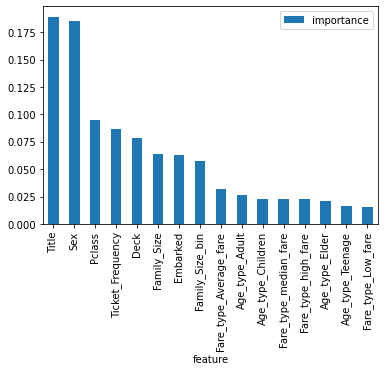

In [256]:
importances.plot.bar()

We are not dropping any column as the column 'Age type teenage' has lowest importance but linked to other Age types as well.

Out of bag (OOB) score is a way of validating the Random forest model.

The RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of the training observations . The out-of-bag (OOB) error is the average error for each  calculated using predictions from the trees that do not contain  in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being trained 1.

In [263]:
print("oob score:", round(randomforest.oob_score_, 4)*100, "%")

oob score: 78.17 %


We will use out-of-bag samples to estimate the generalization accuracy

# Hyper Parameter Tuning

In [265]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(x_train, y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

Testing the model with our best fit parameters

In [266]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 12,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.22 %


Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy.

**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [267]:
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_test, pred)

array([[157,  13],
       [ 25,  73]], dtype=int64)

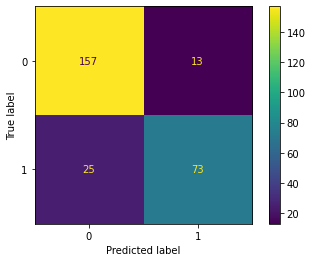

In [271]:
import sklearn
sklearn.metrics.plot_confusion_matrix(clf,x_test,y_test)

From the above plotting, we can see that 157 is True Positive Value and 73 is the True Negative Value.
13 and 25 are error terms and represent False Positive and False Negative respectively. This indicates that 13 people are predicted are Not Survived wrongly and 25 people are predicted as Survived wrongly.

**Precision and Recall**

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

In [274]:
# Precision and Recall:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7874396135265701
Recall: 0.6680327868852459


This indicates that the model predicts 78% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 66 % of the people who actually survived


**F1 score**

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

But there is a catch here. The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall? So, we use it in combination with other evaluation metrics which gives us a complete picture of the result.

In [276]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7228381374722838

There we have it, a 72 % F-score. The score is not that high, because we have a recall of 66%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

**Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part. We will plot the precision and recall with the threshold using matplotlib:

Getting the probabilities of our predictions.

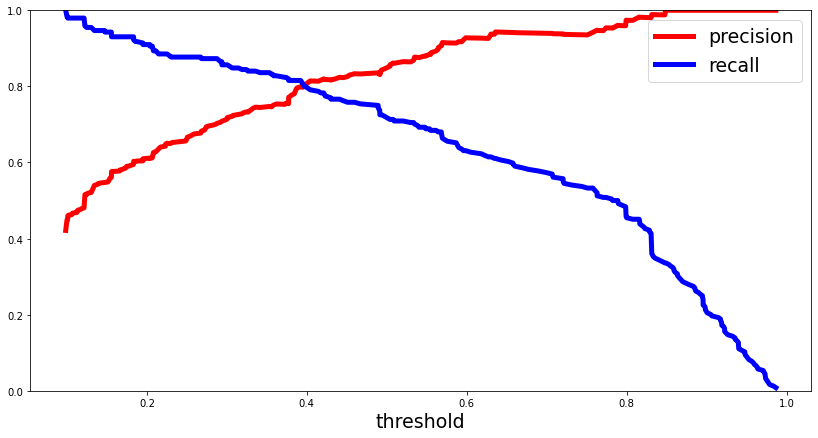

In [277]:
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

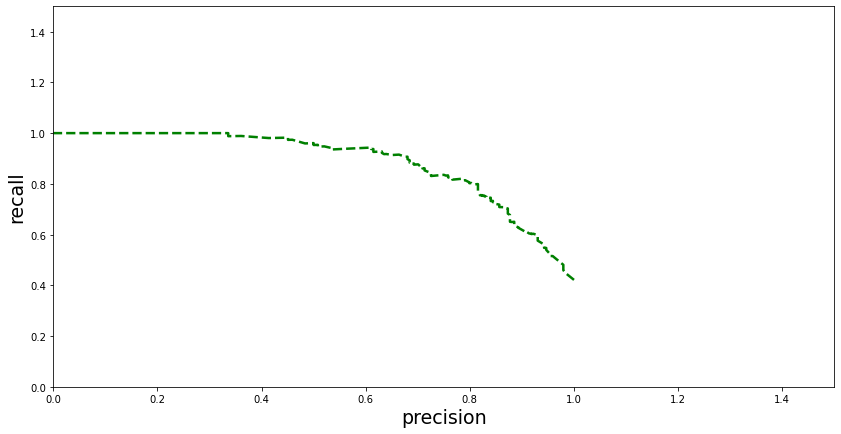

In [278]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**Roc_Auc Curve**

This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

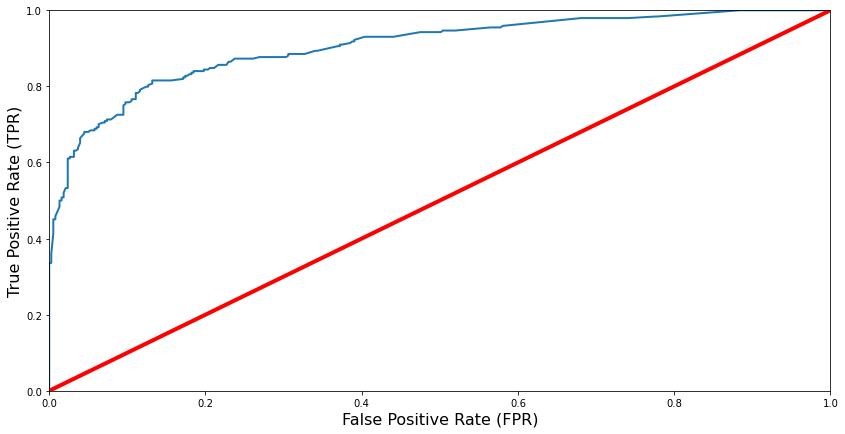

In [280]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

**ROC_AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [281]:
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9050780743111726


# Saving the model

In [283]:
import joblib
joblib.dump(random_forest,'Titanic.obj')

['Titanic.obj']